# 1) Preprocessing

## Load dataset

In [123]:
import pandas as pd
import numpy as np

melanoma_records = pd.read_csv('Melanoma TFRecords 256x256.csv') # loaded as dataframe

## Handle missing values

In [124]:
null_sex = melanoma_records[melanoma_records['sex'].isnull()]
null_sex.isnull().sum() 

image_name                        0
patient_id                        0
sex                              65
age_approx                       65
anatom_site_general_challenge     0
diagnosis                         0
benign_malignant                  0
target                            0
tfrecord                          0
width                             0
height                            0
patient_code                      0
dtype: int64

#### We see that all null values of sex have null ages too. Age and sex are necessary factors for melanoma diagnosis. 
#### Hence, dropping all rows with null sex values.

In [125]:
melanoma_records = melanoma_records[melanoma_records['sex'].notnull()]
melanoma_records.isnull().sum() 

image_name                         0
patient_id                         0
sex                                0
age_approx                         3
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

In [126]:
# we see now only 3 rows have null age

male = melanoma_records[melanoma_records['sex']=='male']
female = melanoma_records[melanoma_records['sex']=='female']
# male.isnull().sum()
female.isnull().sum() 

image_name                         0
patient_id                         0
sex                                0
age_approx                         3
anatom_site_general_challenge    235
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

In [127]:
from sklearn.impute import SimpleImputer

# as all 3 null ages belong to female, we fill them with average value of female ages

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(female[['age_approx']])

melanoma_records['age_approx'] = impute.transform(melanoma_records[['age_approx']])

## Encoding

In [128]:
melanoma_records['sex'].unique()

array(['male', 'female'], dtype=object)

In [129]:
# Encoding sex as male-->0 and female-->1

if not isinstance(melanoma_records['sex'][0], (int, np.integer)):
    melanoma_records['sex'] = melanoma_records['sex'].map({'male':0,'female':1}) 

In [130]:
melanoma_records['anatom_site_general_challenge'].unique()

array(['head/neck', 'upper extremity', 'lower extremity', 'torso', nan,
       'palms/soles', 'oral/genital'], dtype=object)

In [131]:
from sklearn.preprocessing import LabelEncoder

# # encoding anatom_site_general_challenge 
# using one-hot encoding

anatom_site_general_challenge_enc = pd.get_dummies(melanoma_records['anatom_site_general_challenge'])
melanoma_records = pd.concat([melanoma_records, anatom_site_general_challenge_enc], axis=1)

In [132]:
melanoma_records['diagnosis'].unique()

array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
       'lentigo NOS', 'lichenoid keratosis', 'solar lentigo',
       'cafe-au-lait macule', 'atypical melanocytic proliferation'],
      dtype=object)

In [133]:
# encoding diagnosis 

if not isinstance(melanoma_records['diagnosis'][0], (int, np.integer)):
    melanoma_records['diagnosis'] = melanoma_records['diagnosis'].map({'unknown': 0, 'nevus': 1, 'melanoma':2, 
        'seborrheic keratosis':3, 'lentigo NOS':4, 'lichenoid keratosis':5, 'solar lentigo':6,
        'cafe-au-lait macule':7, 'atypical melanocytic proliferation':8}) 

In [134]:
melanoma_records['benign_malignant'].unique()

array(['benign', 'malignant'], dtype=object)

In [135]:
# encoding benign_malignant with values --> 0,1

enc = LabelEncoder()
melanoma_records['benign_malignant'] = enc.fit_transform(melanoma_records['benign_malignant'])

In [136]:
melanoma_records.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,ISIC_2637011,IP_7279968,0,45.0,head/neck,0,0,0,0,6000,4000,0,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,1,45.0,upper extremity,0,0,0,0,6000,4000,1,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,1,50.0,lower extremity,1,0,0,6,1872,1053,2,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,1,45.0,head/neck,0,0,0,0,1872,1053,3,1,0,0,0,0,0
4,ISIC_0074268,IP_8723313,1,55.0,upper extremity,0,0,0,11,6000,4000,4,0,0,0,0,0,1


## Scaling

In [137]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
melanoma_records[['age_approx', 'tfrecord', 'width', 'height', 'patient_code']] = scaler.fit_transform(melanoma_records[['age_approx', 'tfrecord', 'width', 'height', 'patient_code']])

melanoma_records.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,ISIC_2637011,IP_7279968,0,0.500000,head/neck,0,0,0,0.066667,1.000000,0.637681,0.000000,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,1,0.500000,upper extremity,0,0,0,0.066667,1.000000,0.637681,0.000487,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,1,0.555556,lower extremity,1,0,0,0.466667,0.229851,0.103804,0.000973,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,1,0.500000,head/neck,0,0,0,0.066667,0.229851,0.103804,0.001460,1,0,0,0,0,0
4,ISIC_0074268,IP_8723313,1,0.611111,upper extremity,0,0,0,0.800000,1.000000,0.637681,0.001946,0,0,0,0,0,1


## Features and Labels

#### Based on the patient details, we need to predict the diagnosis

#### So, features are the patient details and target labels are the diagnosis 

##### We are ignoring patient_code and target columns

In [138]:
data = np.array([list(melanoma_records['sex']), list(melanoma_records['age_approx']), list(melanoma_records['tfrecord']), 
                 list(melanoma_records['width']), list(melanoma_records['height']), list(melanoma_records['head/neck']), 
                 list(melanoma_records['lower extremity']), list(melanoma_records['oral/genital']), 
                 list(melanoma_records['palms/soles']), list(melanoma_records['torso']), 
                 list(melanoma_records['upper extremity']), list(melanoma_records['benign_malignant'])])

data = np.transpose(data) # so each row contains values of all 12 features in 12 columns 

melanoma_dataset = {
    'feature_values' : data,
    
    'feature_names' : np.array(['sex', 'age_approx', 'tfrecord', 'width', 'height', 'head/neck', 'lower extremity',
                   'oral/genital', 'palms/soles', 'torso', 'upper extremity','benign_malignant']),
        
    'target': np.array(list(melanoma_records['diagnosis'])),
    
    'target_labels' : np.array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis','lentigo NOS', 'lichenoid keratosis',
                    'solar lentigo', 'cafe-au-lait macule', 'atypical melanocytic proliferation'])
}
melanoma_dataset

{'feature_values': array([[0.        , 0.5       , 0.06666667, ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.5       , 0.06666667, ..., 0.        , 1.        ,
         0.        ],
        [1.        , 0.55555556, 0.46666667, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.22222222, 0.26666667, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.55555556, 0.8       , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.5       , 0.33333333, ..., 1.        , 0.        ,
         0.        ]]),
 'feature_names': array(['sex', 'age_approx', 'tfrecord', 'width', 'height', 'head/neck',
        'lower extremity', 'oral/genital', 'palms/soles', 'torso',
        'upper extremity', 'benign_malignant'], dtype='<U16'),
 'target': array([0, 0, 1, ..., 0, 0, 1]),
 'target_labels': array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
        'lentigo NOS', 'lichenoid keratosis', '

# 2) Splitting data into train and test set

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = melanoma_dataset['feature_values']
y = melanoma_dataset['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Support Vector Classifier

In [140]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
svm_accuracy_1 = svc.score(x_test, y_test)

Training accuracy of the model is 0.84
Testing accuracy of the model is 0.84


### Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(x_train, y_train)

print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
rf_accuracy_1 = rfc.score(x_test, y_test)

The Training accuracy of the model is 0.94
The Testing accuracy of the model is 0.91


### Neural Network (MLPClassifier)

In [142]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(5), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
nn_accuracy_1 = nnc.score(x_test, y_test)

The Training accuracy of the model is 0.88
The Testing accuracy of the model is 0.89


#  3) Dimensionality reduction using PCA

In [143]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=6) # Reducing the number of feature vectors into half 
reduced_features= pca.fit_transform(melanoma_dataset['feature_values'])
print(reduced_features)

[[ 0.13558115  0.25207902 -0.7189689   0.17293045  0.55295751  0.95961144]
 [ 0.43378629 -0.69996676 -0.36490838  0.82629502  0.4164039  -0.23177708]
 [ 0.93824008 -0.1382877   0.55487581 -0.3799951   0.05110063 -0.05735904]
 ...
 [ 0.77142638  0.74509826  0.16406035 -0.35283058  0.27178408 -0.12013266]
 [ 0.76572618  0.7688175   0.15895761 -0.34938697 -0.26292078 -0.05486997]
 [-0.57250247  0.58470529  0.3601364  -0.00346887  0.22133147 -0.05115306]]


In [144]:
pca.explained_variance_ratio_

array([0.29595904, 0.20516619, 0.173716  , 0.14752338, 0.06912024,
       0.05641599])

In [145]:
sum(pca.explained_variance_ratio_)

0.9479008431062573

## Splitting reduced features data to test and train

In [146]:
X = reduced_features
y = melanoma_dataset['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Support Vector Classifier after reduction

In [147]:
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
svm_accuracy_2 = svc.score(x_test, y_test)

Training accuracy of the model is 0.82
Testing accuracy of the model is 0.82


### Random Forest after reduction

In [148]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
rf_accuracy_2 = rfc.score(x_test, y_test)

The Training accuracy of the model is 0.94
The Testing accuracy of the model is 0.91


### Neural Network (MLPClassifier) after reduction

In [149]:
nnc=MLPClassifier(hidden_layer_sizes=(5), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
nn_accuracy_2 = nnc.score(x_test, y_test)

The Training accuracy of the model is 0.87
The Testing accuracy of the model is 0.87


# 4) Comparing the accuracy in a bar chart

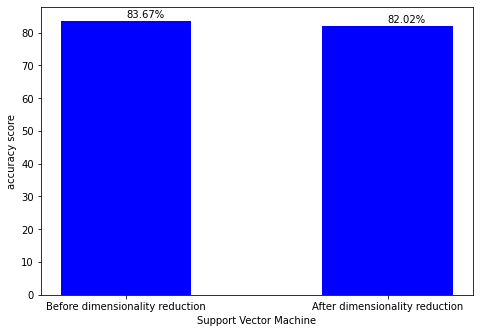

In [153]:
import matplotlib.pyplot as plt

# SVC Comparison

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
prediction_structure = ['Before dimensionality reduction', 'After dimensionality reduction']
accuracy_scores = [round(svm_accuracy_1*100,2), round(svm_accuracy_2*100,2)]
ax.bar(prediction_structure, accuracy_scores, width = 0.5, align='center', color=['blue'])
ax.set_ylabel('accuracy score')
ax.set_xlabel('Support Vector Machine')
for index,data in enumerate(accuracy_scores):
    plt.text(x=index , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))
plt.show()

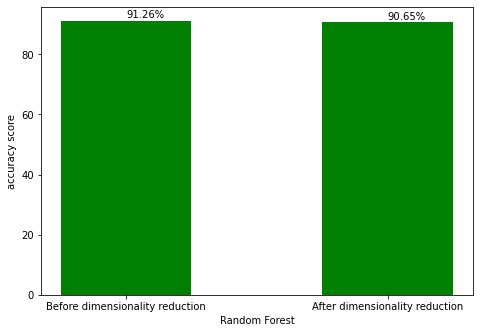

In [154]:
# Random Forest Comparison

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
prediction_structure = ['Before dimensionality reduction', 'After dimensionality reduction']
accuracy_scores = [round(rf_accuracy_1*100,2), round(rf_accuracy_2*100,2)]
ax.bar(prediction_structure, accuracy_scores, width = 0.5, align='center', color=['green'])
ax.set_ylabel('accuracy score')
ax.set_xlabel('Random Forest')
for index,data in enumerate(accuracy_scores):
    plt.text(x=index , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))
plt.show()

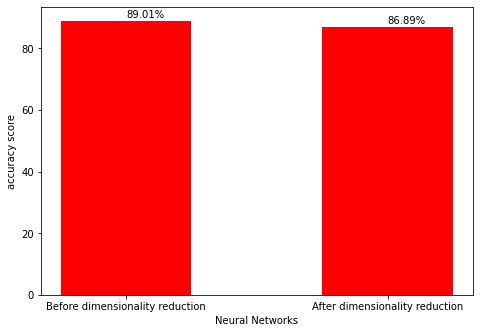

In [155]:
# Neural Networks (MLP) Comparison

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
prediction_structure = ['Before dimensionality reduction', 'After dimensionality reduction']
accuracy_scores = [round(nn_accuracy_1*100,2), round(nn_accuracy_2*100,2)]
ax.bar(prediction_structure, accuracy_scores, width = 0.5, align='center', color=['red'])
ax.set_ylabel('accuracy score')
ax.set_xlabel('Neural Networks')
for index,data in enumerate(accuracy_scores):
    plt.text(x=index , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))
plt.show()

#### We can observe that by reducing half the features, we have lost some valuable information, for which the accuracy score for all three models, SVM, RF, NN, have decreased.